In [90]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# The idea is to use the image equirectangular.png in res/ and the colors HSV
# (yellow: 57.9, 100, 100) and (blue: 240, 100, 100)
# to define the left and right face cubemap images corresponding to the equirectangular image.
pano_mask = np.array(Image.open('res/equirectangular.png'))
# Resize it to 2000x1000
pano_mask = cv2.resize(pano_mask, (2000, 1000))

# Define the RGB values for yellow
yellow_rgb = np.array([255, 246, 0])
# Define the RGB values for blue
blue_rgb = np.array([0, 0, 255])
# Convert it to HSV
yellow_hsv = cv2.cvtColor(np.uint8([[yellow_rgb]]), cv2.COLOR_RGB2HSV)[0][0]
blue_hsv = cv2.cvtColor(np.uint8([[blue_rgb]]), cv2.COLOR_RGB2HSV)[0][0]

# Threshold the image based on the HSV values
yellow_lower = np.array([yellow_hsv[0] - 10, yellow_hsv[1], yellow_hsv[2]])
yellow_upper = np.array([yellow_hsv[0] + 10, 255, 255])
yellow_mask = cv2.inRange(cv2.cvtColor(pano_mask, cv2.COLOR_RGB2HSV), yellow_lower, yellow_upper)

blue_lower = np.array([blue_hsv[0] - 10, blue_hsv[1], blue_hsv[2]])
blue_upper = np.array([blue_hsv[0] + 10, 255, 255])
blue_mask = cv2.inRange(cv2.cvtColor(pano_mask, cv2.COLOR_RGB2HSV), blue_lower, blue_upper)

# Fill any small holes inside the masks
yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))
blue_mask = cv2.morphologyEx(blue_mask, cv2.MORPH_CLOSE, np.ones((25, 25), np.uint8))

'''# Find the contours in the masks
yellow_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding boxes for the contours
yellow_boxes = [cv2.boundingRect(c) for c in yellow_contours]
blue_boxes = [cv2.boundingRect(c) for c in blue_contours]

# Print the bounding boxes
print("Yellow boxes:", yellow_boxes)
print("Blue boxes:", blue_boxes)

# Visualize the bounding boxes on the original image
for box in yellow_boxes:
    cv2.rectangle(pano_mask, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)
for box in blue_boxes:
    cv2.rectangle(pano_mask, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 0, 255), 2)

# Show the image
plt.imshow(pano_mask)
plt.show()'''

'# Find the contours in the masks\nyellow_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\nblue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)\n\n# Find the bounding boxes for the contours\nyellow_boxes = [cv2.boundingRect(c) for c in yellow_contours]\nblue_boxes = [cv2.boundingRect(c) for c in blue_contours]\n\n# Print the bounding boxes\nprint("Yellow boxes:", yellow_boxes)\nprint("Blue boxes:", blue_boxes)\n\n# Visualize the bounding boxes on the original image\nfor box in yellow_boxes:\n    cv2.rectangle(pano_mask, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)\nfor box in blue_boxes:\n    cv2.rectangle(pano_mask, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 0, 255), 2)\n\n# Show the image\nplt.imshow(pano_mask)\nplt.show()'

Boxes: [(1317, 319, 404, 423), (253, 468, 209, 135)]
Centers: [(1519, 530), (357, 535)]


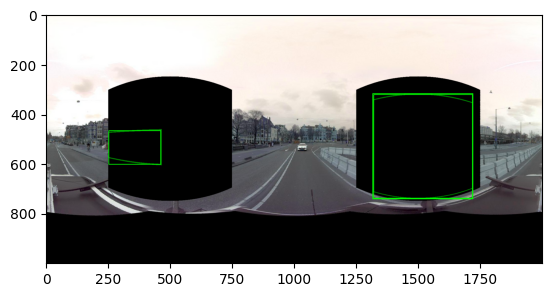

In [94]:
import cv2

# Load the image
img = cv2.imread('equitest.png')

# Find the contours in the image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# Find the bounding boxes for the contours
boxes = [cv2.boundingRect(c) for c in contours]

# Choose only boxes inside the yellow region and the blue region
boxes = [box for box in boxes if yellow_mask[box[1] + box[3] // 2, box[0] + box[2] // 2] == 255 or blue_mask[box[1] + box[3] // 2, box[0] + box[2] // 2] == 255]

# We expect that the largest boxes will be the ones enclosing the masks, so we remove them
boxes = sorted(boxes, key=lambda box: box[2] * box[3], reverse=True)[2:]

# Put the bounding boxes on the image
for box in boxes:
    cv2.rectangle(img, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)

# If two bounding boxes are really close (let's say 5 pixels), we merge them
for i in range(len(boxes)):
    for j in range(i + 1, len(boxes)):
        if abs(boxes[i][0] - boxes[j][0]) < 5 and abs(boxes[i][1] - boxes[j][1]) < 5:
            boxes[i] = (min(boxes[i][0], boxes[j][0]), min(boxes[i][1], boxes[j][1]), max(boxes[i][0] + boxes[i][2], boxes[j][0] + boxes[j][2]) - min(boxes[i][0], boxes[j][0]), max(boxes[i][1] + boxes[i][3], boxes[j][1] + boxes[j][3]) - min(boxes[i][1], boxes[j][1]))
            boxes[j] = (0, 0, 0, 0)
boxes = [box for box in boxes if box[2] * box[3] > 0]

# Calculate the center of the bounding boxes
centers = [(box[0] + box[2] // 2, box[1] + box[3] // 2) for box in boxes]

# Print the boxes and centers
print("Boxes:", boxes)
print("Centers:", centers)

# SHow the result
plt.imshow(img)
plt.show()

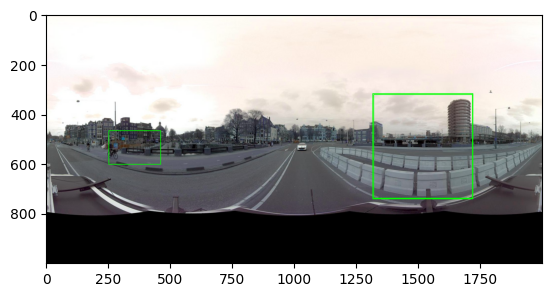

In [92]:
from PIL import Image
import matplotlib.pyplot as plt

# Find original pano
pano_original = cv2.imread('res/dataset/centrum_west_small/reoriented/TMX7316010203-002032_pano_0000_001688')

# Take the bounding boxes and put them on the original pano
for box in boxes:
    cv2.rectangle(pano_original, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), (0, 255, 0), 2)

# Show the result
plt.imshow(pano_original)
plt.show()

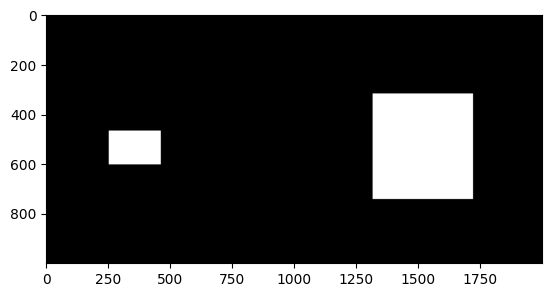

AttributeError: module 'pycocotools' has no attribute 'mask'

In [99]:
import pycocotools.mask as mask_util

# Make a black image with the same size as the original pano, put the bounding boxes in it, fill the boxes and make everything white
pano_mask = np.zeros((pano_original.shape[0], pano_original.shape[1]), np.uint8)
for box in boxes:
    cv2.rectangle(pano_mask, (box[0], box[1]), (box[0] + box[2], box[1] + box[3]), 255, -1)

# Show the result
plt.imshow(pano_mask, cmap='gray')
plt.show()

# Convert the mask to a pycocotools mask
pano_mask = mask_util.encode(np.asfortranarray(pano_mask))

print(pano_mask)

# Save
#cv2.imwrite('pano_mask.png', pano_mask)